In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [59]:
churn_df = pd.read_csv('/content/gdrive/MyDrive/Churn_Modelling (2).csv')

In [38]:
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


4.Descriptive statistics

In [39]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


3.UNIVARIATE ANALYSIS

i.)Distribution plots - Probability Density Distribution curve is plotted. 

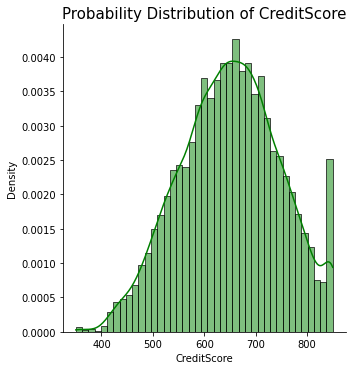

In [40]:
sns.displot(churn_df.CreditScore,kde=True,color='g',stat="density")
plt.title("Probability Distribution of CreditScore", fontsize=15)
plt.show()

ii.)Geography Distribution

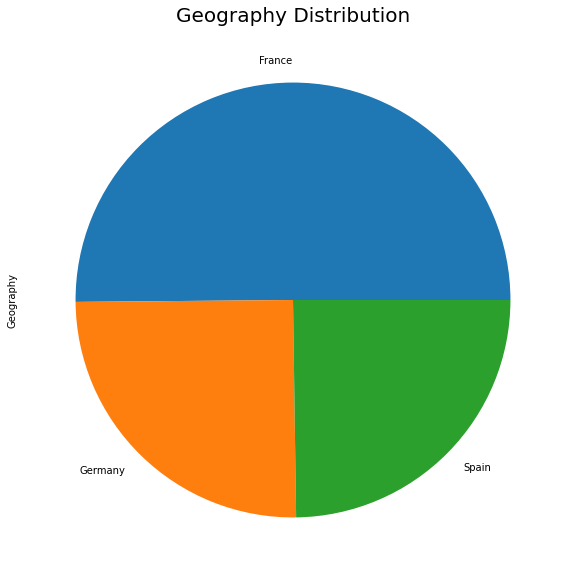

In [41]:
plt.figure(figsize=[10,10])
plt.title("Geography Distribution",fontsize=20)
churn_df['Geography'].value_counts().plot.pie()
plt.show()

iii)CountPlot

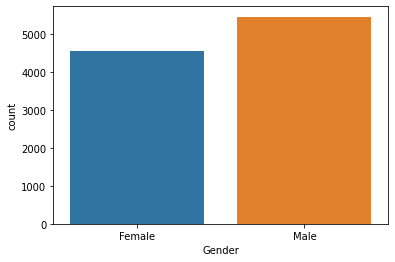

In [42]:
sns.countplot(x=churn_df.Gender)
plt.show()

ii)BIVARIATE ANALYSIS

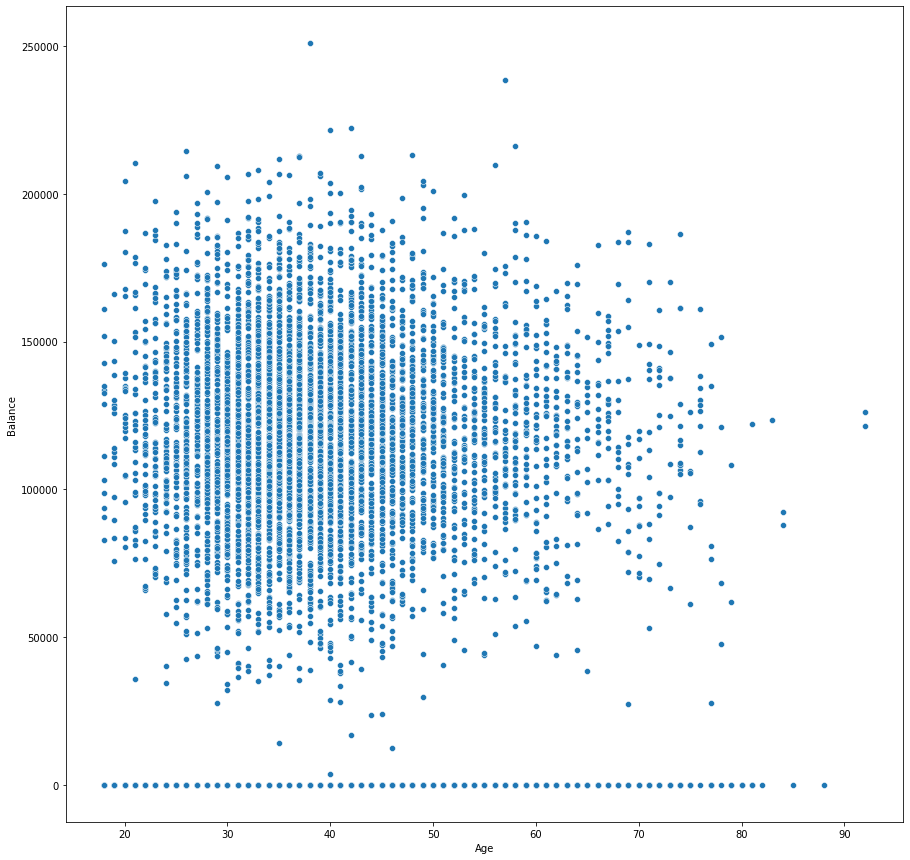

In [43]:
plt.figure(figsize=[15,15])
sns.scatterplot(x=churn_df.Age,y=churn_df.Balance)
plt.show()

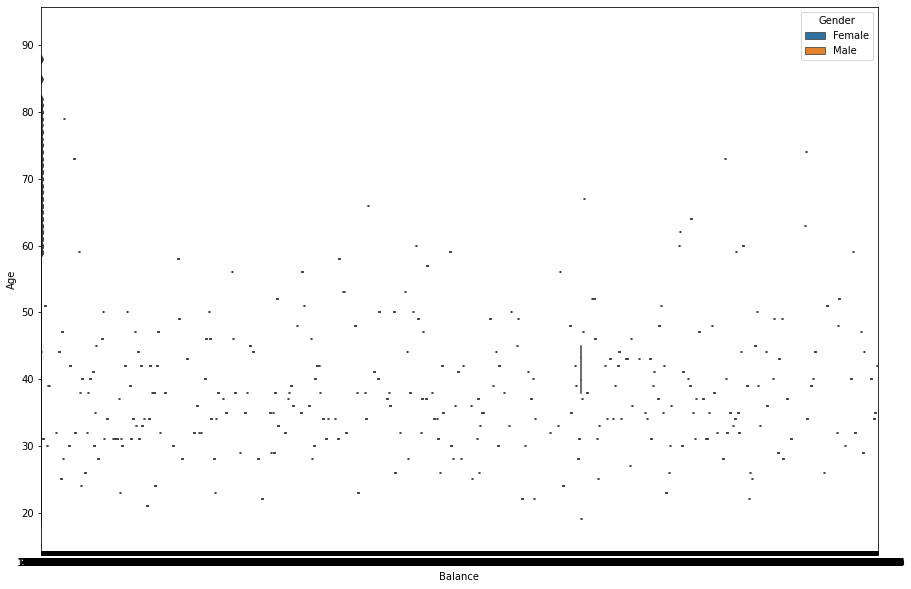

In [44]:
fig, ax1=plt.subplots(figsize=(15,10))
testplot=sns.boxplot(ax=ax1,x='Balance',y='Age',hue='Gender',data=churn_df)

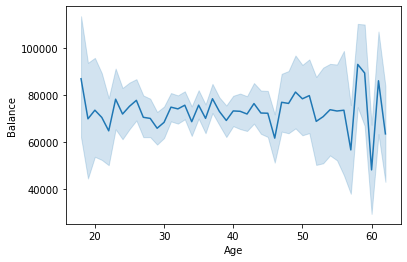

In [82]:
sns.lineplot(x=churn_df.Age,y=churn_df.Balance)
plt.show()

5.Handling Missing Values

In [45]:
churn_df.isnull().sum().sum() 

0

  No missing values in the given dataset

6.Replacing the outliers 

In [60]:
Q1 = churn_df.quantile(0.25)
Q3 = churn_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64


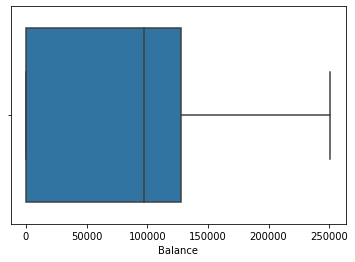

In [61]:
sns.boxplot(x='Balance',data=churn_df)
plt.show()

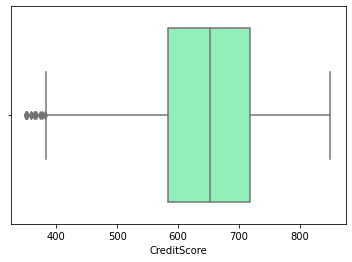

In [62]:
sns.boxplot(x='CreditScore',data=churn_df,palette='rainbow')
plt.show()

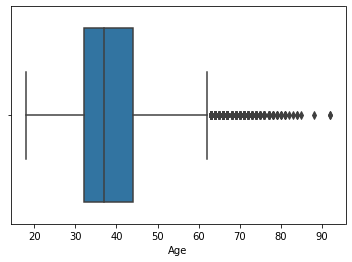

In [63]:
sns.boxplot(x='Age',data=churn_df)
plt.show()

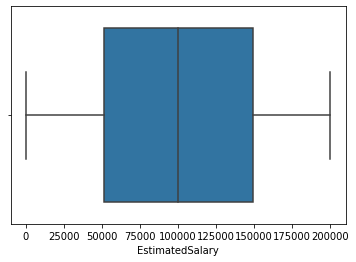

In [64]:
sns.boxplot(x='EstimatedSalary',data=churn_df)
plt.show()

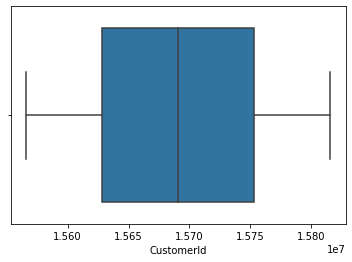

In [65]:
sns.boxplot(x='CustomerId',data=churn_df)
plt.show()

In [66]:
# removes the outliers row
churn_df= churn_df[~((churn_df < (Q1 - 1.5 * IQR)) |(churn_df > (Q3 + 1.5 * IQR))).any(axis=1)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [67]:
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


6.Encoding for Categorical Column

In [68]:
#on Geogarphy column
geo_oenc=pd.get_dummies(churn_df['Geography'],drop_first=True)
#on gender column 
gen_oenc = pd.get_dummies(churn_df['Gender'],drop_first=True)

In [69]:
churn_df = pd.concat([churn_df,geo_oenc,gen_oenc],axis=1)

In [70]:
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,0,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,0,1
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,0,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1


In [71]:
#inplace is used to fix the changed values permanently into the dataset.
churn_df.drop(['Gender','Geography'],axis=1,inplace=True)

In [72]:
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
6,7,15592531,Bartlett,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
8,9,15792365,He,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,28,7,155060.41,1,1,0,29179.52,0,0,0,1
9994,9995,15719294,Wood,800,29,2,0.00,2,0,0,167773.55,0,0,0,0
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1


8. Split the data into dependent and independent variables.

In [76]:
#dependent varible
y= churn_df['EstimatedSalary']

In [77]:
#independent variable
x = churn_df.drop(['RowNumber','CustomerId','Surname'],axis=1)

9. Scale the independent variables

In [78]:
from sklearn.preprocessing import scale

In [80]:
x_scaled=pd.DataFrame(scale(x),columns=x.columns)
x_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,-0.455004,0.599817,-1.403186,0.174070,-1.072759,-1.553061,0.923583,0.221181,0.0,-0.521208,1.691647,-1.158437
1,0.496133,0.350214,-1.403186,-1.159714,0.892771,-1.553061,-1.082740,-0.104937,0.0,-0.521208,-0.591140,-1.158437
2,2.074392,0.849420,-1.055481,0.837764,-1.072759,0.643890,0.923583,-0.361820,0.0,-0.521208,1.691647,-1.158437
3,1.781735,1.723029,0.683046,-1.159714,0.892771,0.643890,0.923583,-1.564488,0.0,-0.521208,-0.591140,0.863232
4,-1.573373,0.974221,-0.360070,1.100999,0.892771,-1.553061,0.923583,-0.434020,0.0,-0.521208,-0.591140,0.863232


9.splitting the data

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [84]:
X_train.shape


(5373, 12)

In [85]:
X_test.shape

(2304, 12)

In [86]:
y_train.shape

(5373,)

In [87]:
y_test.shape

(2304,)